<a href="https://colab.research.google.com/github/Dheerajthummala/Decision_tree/blob/main/Decision_tree(Fraud_check).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [71]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [72]:
# as you can see "undergrad","martial.status","work.experience" are in categorical variables
data1=data.copy()
data1=pd.get_dummies(data,prefix=['Undergrad','Martial.Status','Urban'],drop_first=True)
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Martial.Status_Married,Martial.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [74]:
# as given the taxable.income <=30000 are risky and others are good
lable=['Risky','good']
cut=[0,30000,100000]
data1['Tax']=pd.cut(data1['Taxable.Income'],bins=cut,labels=lable)
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Martial.Status_Married,Martial.Status_Single,Urban_YES,Tax
0,68833,50047,10,0,0,1,1,good
1,33700,134075,18,1,0,0,1,good
2,36925,160205,30,0,1,0,1,good
3,50190,193264,15,1,0,1,1,good
4,81002,27533,28,0,1,0,0,good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,good
596,69967,55369,2,1,0,0,1,good
597,47334,154058,0,0,0,0,1,good
598,98592,180083,17,1,1,0,0,good


In [76]:
# making target varible to indicator values
data2=pd.get_dummies(data1,prefix=['Tax'],drop_first=True)
data2

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Martial.Status_Married,Martial.Status_Single,Urban_YES,Tax_good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [77]:
data2.Tax_good.value_counts()

1    476
0    124
Name: Tax_good, dtype: int64

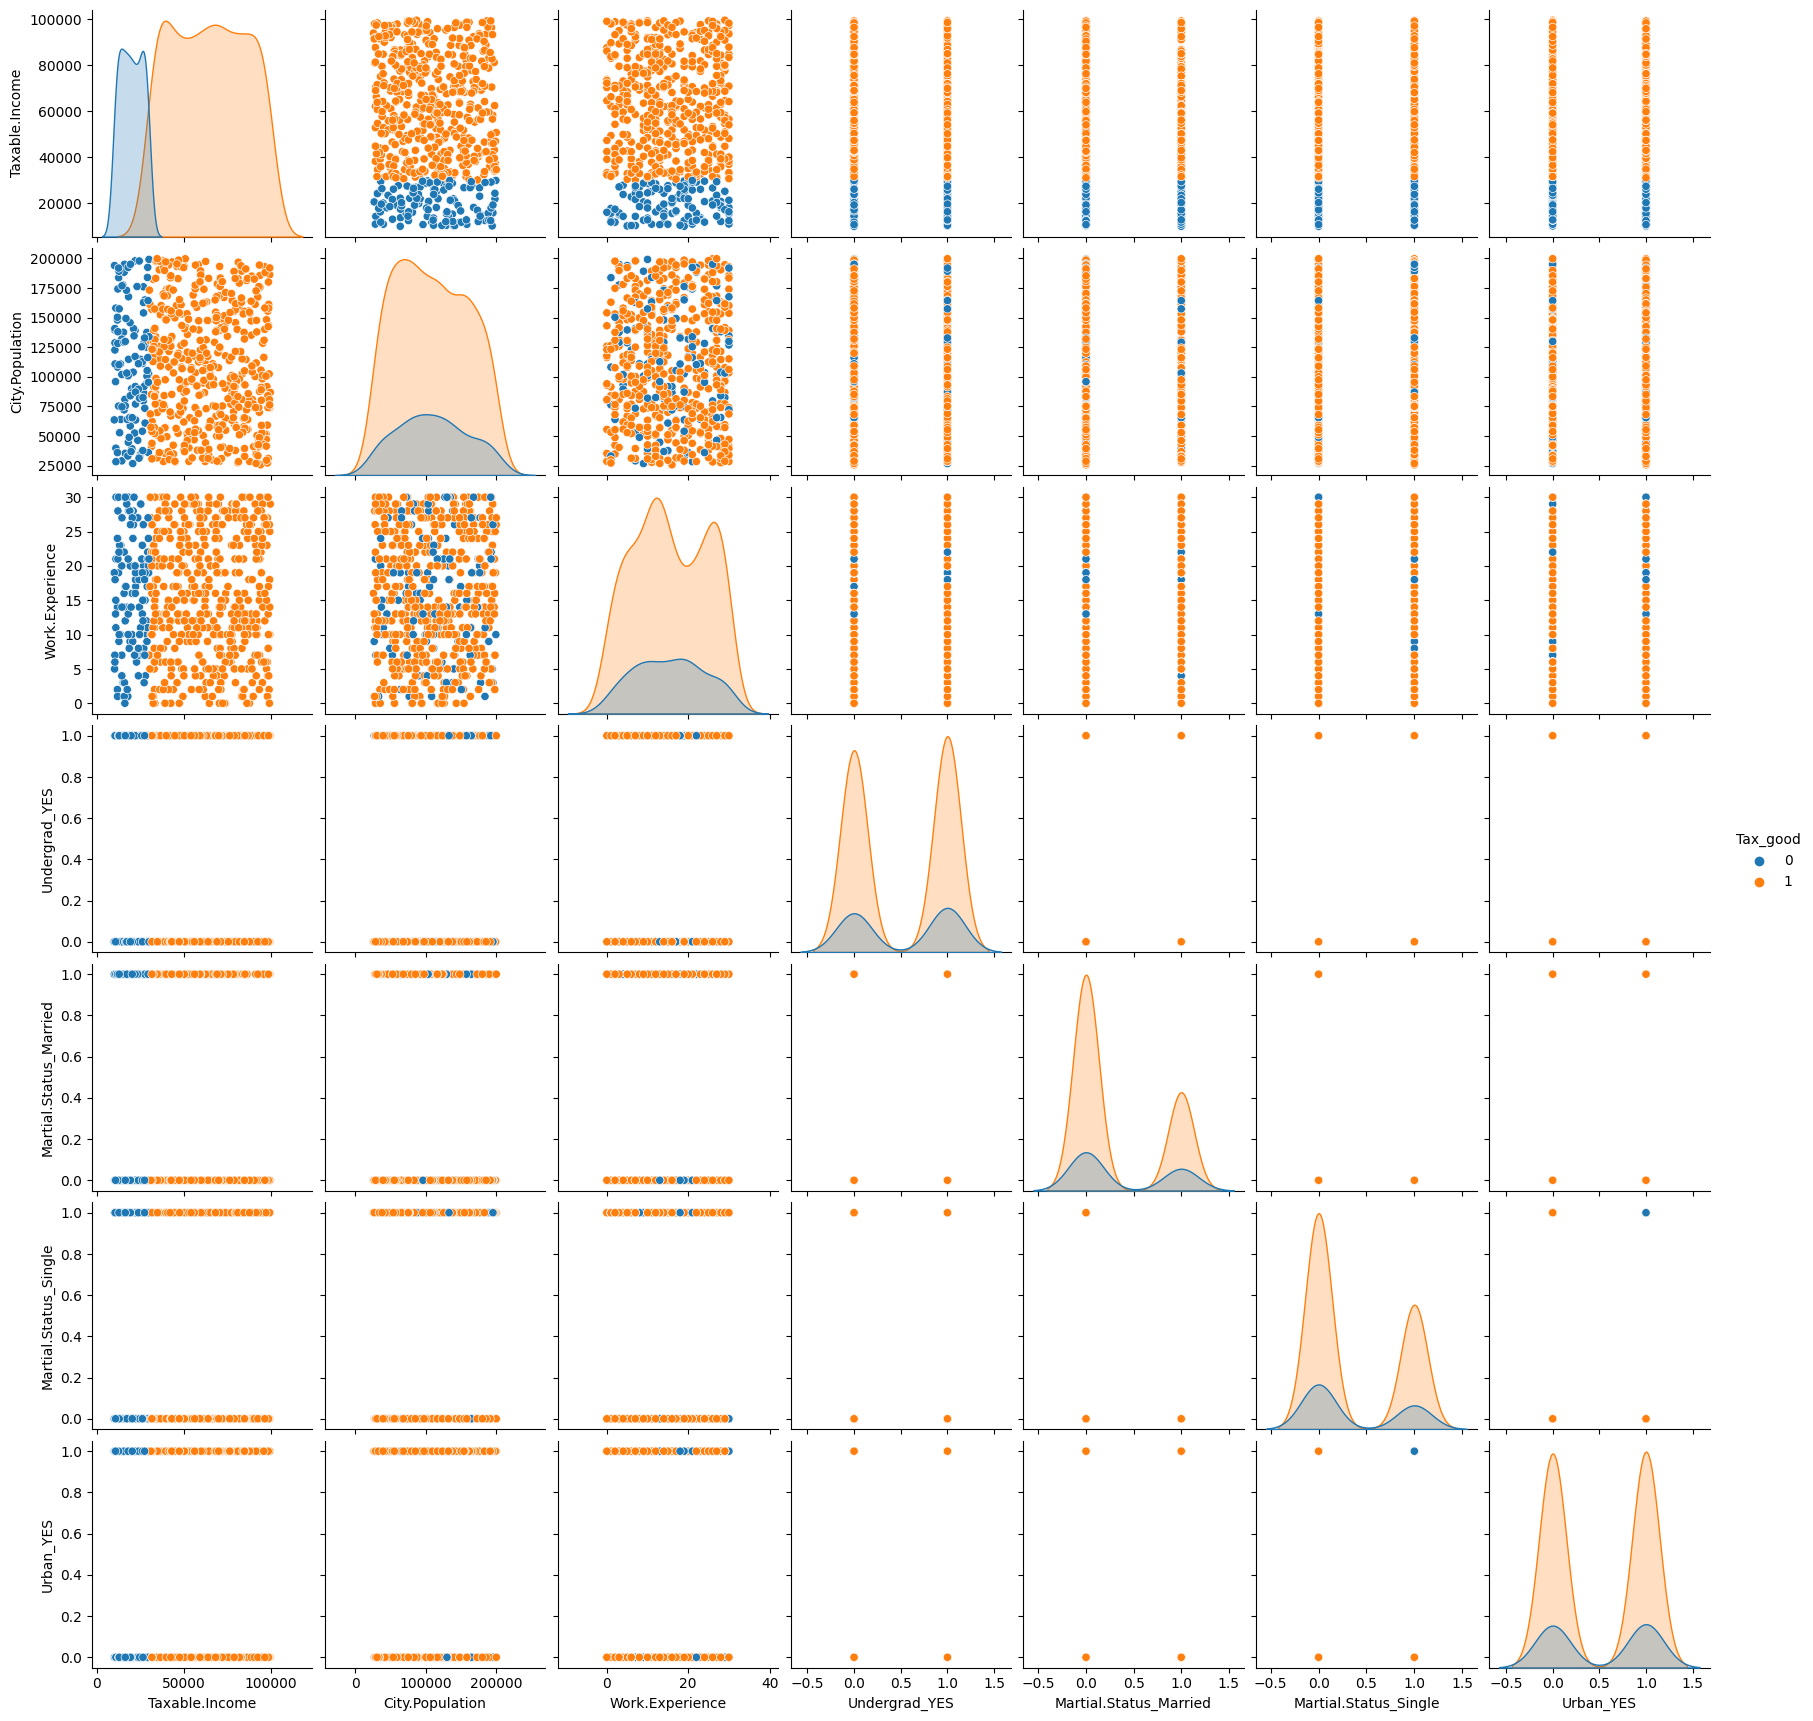

In [78]:
sns.pairplot(data=data2,hue='Tax_good')

In [79]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable.Income          600 non-null    int64
 1   City.Population         600 non-null    int64
 2   Work.Experience         600 non-null    int64
 3   Undergrad_YES           600 non-null    uint8
 4   Martial.Status_Married  600 non-null    uint8
 5   Martial.Status_Single   600 non-null    uint8
 6   Urban_YES               600 non-null    uint8
 7   Tax_good                600 non-null    uint8
dtypes: int64(3), uint8(5)
memory usage: 17.1 KB


In [80]:
#dropping the taxable income for we already consider them int tax categorical
data2.drop('Taxable.Income', axis=1, inplace = True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   City.Population         600 non-null    int64
 1   Work.Experience         600 non-null    int64
 2   Undergrad_YES           600 non-null    uint8
 3   Martial.Status_Married  600 non-null    uint8
 4   Martial.Status_Single   600 non-null    uint8
 5   Urban_YES               600 non-null    uint8
 6   Tax_good                600 non-null    uint8
dtypes: int64(2), uint8(5)
memory usage: 12.4 KB


In [81]:
X=data2.iloc[:,0:6]
Y=data2.iloc[:,6]

In [82]:
X

,City.Population,Work.Experience,Undergrad_YES,Martial.Status_Married,Martial.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [83]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Tax_good, Length: 600, dtype: uint8

In [84]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [97]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [98]:
data2.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_YES',
       'Martial.Status_Married', 'Martial.Status_Single', 'Urban_YES',
       'Tax_good'],
      dtype='object')

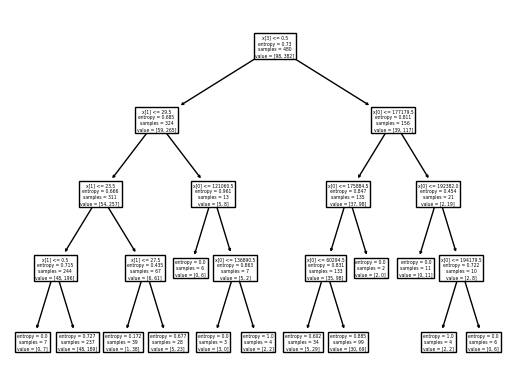

In [99]:
tree.plot_tree(model);


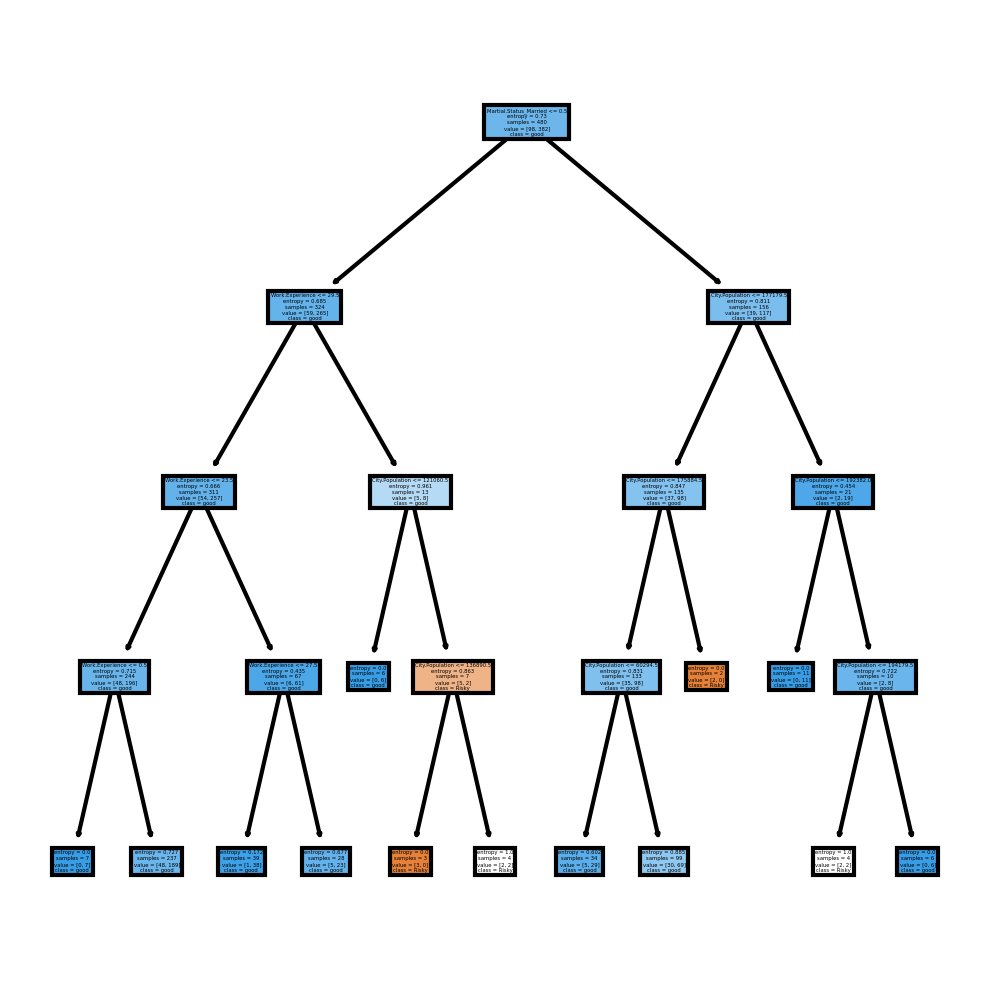

In [107]:
fn=['City.Population', 'Work.Experience', 'Undergrad_YES',
       'Martial.Status_Married', 'Martial.Status_Single', 'Urban_YES',
       ]
cn=['Risky','good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [108]:
text = tree.export_text(model,max_depth=4)
print(text)

|--- feature_3 <= 0.50
|   |--- feature_1 <= 29.50
|   |   |--- feature_1 <= 23.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  23.50
|   |   |   |--- feature_1 <= 27.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  27.50
|   |   |   |   |--- class: 1
|   |--- feature_1 >  29.50
|   |   |--- feature_0 <= 121060.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  121060.50
|   |   |   |--- feature_0 <= 136890.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  136890.50
|   |   |   |   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_0 <= 177179.50
|   |   |--- feature_0 <= 175884.50
|   |   |   |--- feature_0 <= 60294.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  60294.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  175884.50
|   |   |   |--- class: 0
|   |--- feature_0 >  177179.50
|   |   |--- feature_0 <= 192382.0

In [109]:
model.feature_importances_

array([0.63011368, 0.31217174, 0.        , 0.05771458, 0.        ,
       0.        ])

In [110]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

City.Population           0.630114
Work.Experience           0.312172
Martial.Status_Married    0.057715
Undergrad_YES             0.000000
Martial.Status_Single     0.000000
Urban_YES                 0.000000
dtype: float64

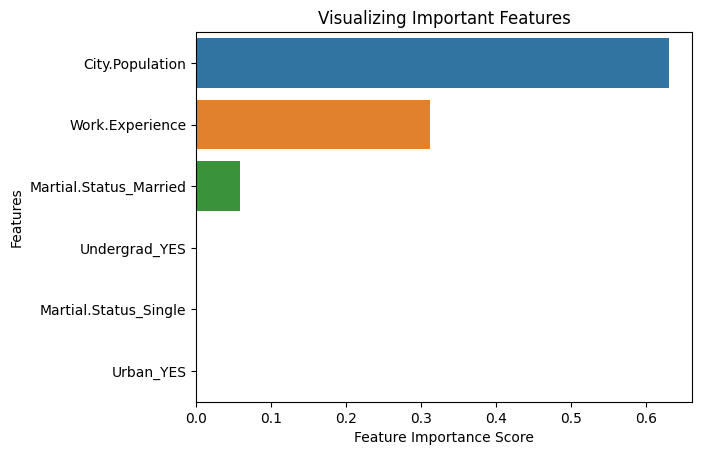

In [111]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [118]:
#Predicting on test data
preds = model.predict(X) # predicting on test data set
pd.Series(preds).value_counts()

1    586
0     14
dtype: int64

In [119]:
# 20% of our data
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [121]:
pd.crosstab(Y,preds)

col_0,0,1
Tax_good,,
0,9,115
1,5,471


In [123]:
# Accuracy
np.mean(preds==Y)

0.8

In [124]:
#Gini criteria
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [125]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [128]:
pred=model.predict(X)
np.mean(pred==Y)

0.8

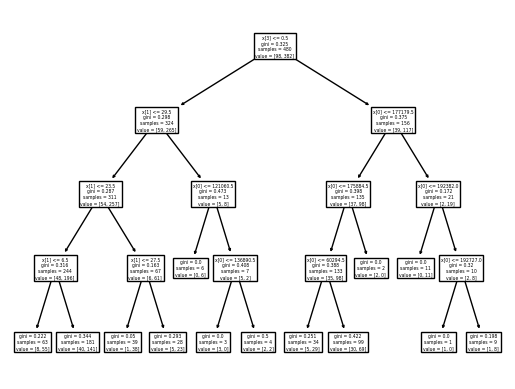

In [129]:
tree.plot_tree(model_gini);


In [130]:
prediction=pd.DataFrame()
prediction['pred_tax']=pred
prediction['tax']=Y
prediction

,pred_tax,tax
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
595,1,1
596,1,1
597,1,1
598,1,1
